In [1]:
#My three imports
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt


In [2]:
#Reading in the working data file
df = pd.read_csv('../input/dataset50/data0.csv', low_memory=False)
df2 =  pd.read_csv('../input/dataduration51/dataset_edited.csv', low_memory=False)

<AxesSubplot:ylabel='Frequency'>

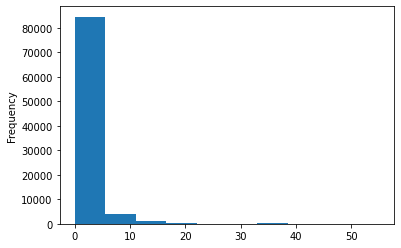

In [3]:
df2['Time Total (Min)'].plot(kind='hist')

<BarContainer object of 76 artists>

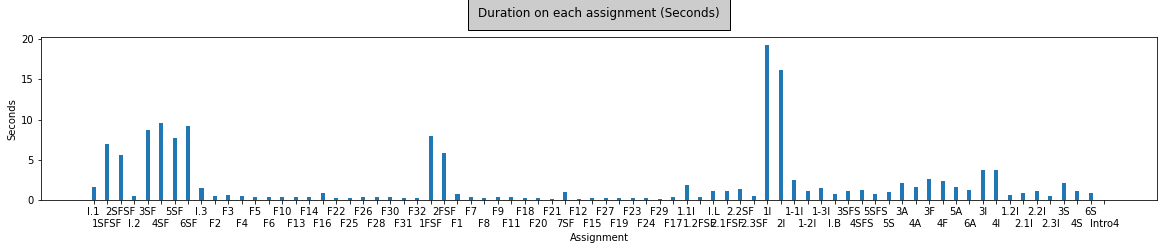

In [4]:
#Problem Name lists various values for problems and problem steps; however, we must make them unique in order to distgunish the entries of other students
dataPrblms = df["Problem Name"].unique()
countSeconds = []
total = 0;
#We iterate through the Problem Name column in order to populate countSeconds Array with a second(s) value
for prblm in dataPrblms:
    dataCount = df[df["Problem Name"] == prblm]
    countSeconds.append(dataCount['Duration (sec)'].sum()/3600.0)
    total+=1
    if total % 2 == 0:
        dataPrblms[total-1] = "\n"+prblm

#Y axis will be the Seconds per assignment and X axis will be all the variating problem levels.        
plt.figure(figsize=(20, 3))
plt.ylabel('Seconds')
plt.xlabel('Assignment')
plt.title("Duration on each assignment (Seconds)", pad = 20, bbox={'facecolor':'0.8', 'pad':10})
plt.bar(dataPrblms, countSeconds, align='center', width=0.3)

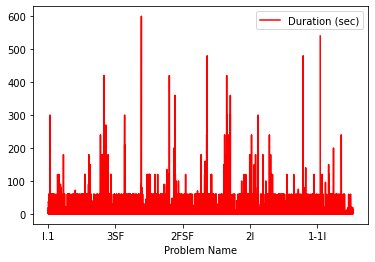

In [5]:
# gca stands for 'get current axis'
ax = plt.gca()


df.plot(kind='line',x='Problem Name',y='Duration (sec)', color='red', ax=ax)

plt.show()

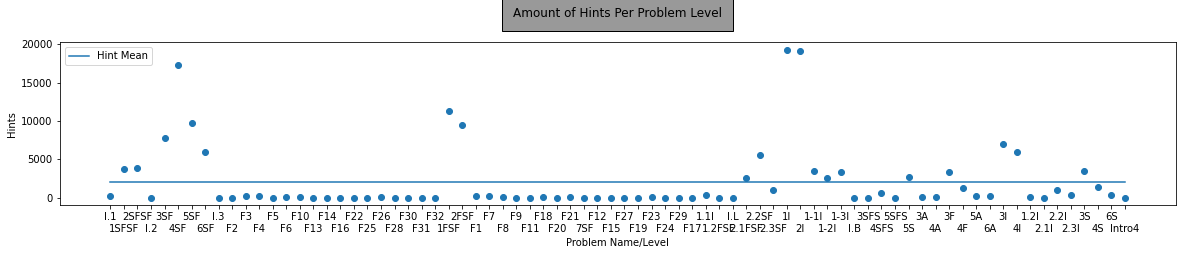

In [6]:
prblmHints = []
#Problem Name lists various values for problems and problem steps; however, we must make them unique in order to distgunish the entries of other students
dataPrblms = df["Problem Name"].unique()
total = 0;
#We iterate through the Problem Name column in order to populate countSeconds Array with a second(s) value
for prblm in dataPrblms:
    dataCount = df[df["Problem Name"] == prblm]
    prblmHints.append(dataCount[dataCount["Student Response Type"] == 'HINT_REQUEST'].size)
    total+=1
    if total % 2 == 0:
        dataPrblms[total-1] = "\n"+prblm

#Y axis will be the Seconds per assignment and X axis will be all the variating problem levels.        
plt.figure(figsize=(20, 3))

#calculate hints per step
totalHints = plt.scatter(dataPrblms, prblmHints)
mean = sum(prblmHints)/len(prblmHints)
averageHint = plt.plot(dataPrblms, [mean]*len(dataPrblms), label='Hint Mean')
legent = plt.legend(loc ='upper left')
plt.title("Amount of Hints Per Problem Level", pad = 25, bbox={'facecolor':'0.6', 'pad':11})
plt.ylabel('Hints')
plt.xlabel('Problem Name/Level')


plt.show()